In [443]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr
import seaborn as sb

# Data semantic 

In [ ]:
# Data semantic
df = pd.read_csv('training.csv')
print(len(df))

In [ ]:
# Data semantic
df.info()

# Data distribution and statistics 

In [ ]:
dfSize = df['Size']
sizeSr = dfSize.value_counts()
print(sizeSr)
print(sizeSr.sum())
fgsize = sizeSr.plot(kind='pie', title='SIZE', 
           autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*sizeSr.sum()), 
           figsize=(11, 11))
fgsize.yaxis.set_label_text('')

In [ ]:
print(df['MMRAcquisitionAuctionAveragePrice'].mean())
print(df['MMRAcquisitionAuctionCleanPrice'].mean())
print(df['MMRAcquisitionRetailAveragePrice'].mean())
print(df['MMRAcquisitonRetailCleanPrice'].mean())
print(df['MMRCurrentAuctionAveragePrice'].mean())
print(df['MMRCurrentAuctionCleanPrice'].mean())
print(df['MMRCurrentRetailAveragePrice'].mean())
print(df['MMRCurrentRetailCleanPrice'].mean())
print(df['VehBCost'].mean())

In [ ]:
# df['MMRAcquisitionAuctionAveragePrice'].hist(bins = 200)

aap = df['MMRAcquisitionAuctionAveragePrice'].plot(kind='hist', bins = 17, 
                                             subplots=True,sharex=True,sharey=True,
                                             title='Price at the auction for average condition')
aap[0].set_xlabel("Dollar")

In [ ]:
nationsr = df['Nationality'].value_counts()
print(nationsr)
print(nationsr.sum())
fgnat = nationsr.plot(kind='pie', title = 'NATIONALITY', figsize =(7, 7),
             autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*nationsr.sum()))
fgnat.yaxis.set_label_text('')

In [ ]:
colorsr = df['Color'].value_counts()
print(colorsr)
print(len(colorsr))
print(colorsr[:14])
spcolordf = pd.DataFrame(data=colorsr[:14])
othercolorval = len(df) - df['Color'].value_counts().sum() + colorsr[14:].sum()
print(othercolorval)
othercolordt = {'Color': [othercolorval]}
othercolordf = pd.DataFrame(othercolordt, index=['OTHER OR NOT AVAIL'])
allcolor = pd.concat([spcolordf, othercolordf])
# print(allcolor)
fgcolor = allcolor.plot.pie(y='Color', figsize=(15, 15), title='COLOR', autopct = "%1.1f%%", 
                            pctdistance=1.1, labeldistance = 1.2)
fgcolor.yaxis.set_label_text('')
print(allcolor.sum())

In [ ]:
rap = df['MMRAcquisitionRetailAveragePrice'].plot(kind='hist', bins = 200, 
                                             subplots=True,sharex=True,sharey=True,
                                             title='Retail price for average condition')
rap[0].set_xlabel("Dollar")

In [ ]:
aaap = df['MMRAcquisitionAuctionCleanPrice'].plot(kind='hist', bins = 200, 
                                           subplots=True,sharex=True,sharey=True,
                                           title='Price at the auction for above average condition')
aaap[0].set_xlabel('Dollar')

In [ ]:
dfAcqCur = pd.DataFrame(data = {'Acquisition mean price': [round(df['MMRAcquisitionAuctionAveragePrice'].mean(), 2), 
                                             round(df['MMRAcquisitionAuctionCleanPrice'].mean(), 2),
                                             round(df['MMRAcquisitionRetailAveragePrice'].mean(), 2),
                                             round(df['MMRAcquisitonRetailCleanPrice'].mean(), 2)],
    'Current mean price': [round(df['MMRCurrentAuctionAveragePrice'].mean(), 2), 
                                             round(df['MMRCurrentAuctionCleanPrice'].mean(), 2),
                                             round(df['MMRCurrentRetailAveragePrice'].mean(), 2),
                                             round(df['MMRCurrentRetailCleanPrice'].mean(), 2)], 
                               'Mean bought vehicle price': [round(df['VehBCost'].mean(), 2), 
                                             round(df['VehBCost'].mean(), 2),
                                             round(df['VehBCost'].mean(), 2),
                                             round(df['VehBCost'].mean(), 2)]}, 
                        index = ['Auction on Average',
                                             'Auction Above average',
                                             'Retail on Average',
                                             'Retail Above average'],)
dfVeB = pd.DataFrame(data = {'Mean price': [round(df['VehBCost'].mean(), 2)]}, 
                    index = ['Bought cost'])


print(dfAcqCur)


fgAcqCur = dfAcqCur[['Acquisition mean price', 'Current mean price']].plot(kind = 'bar', 
                                                                title = 'Acquisition and current mean price for average and above average condition')
plt.setp(fgAcqCur.get_xticklabels(), rotation=20, ha ='right')
# dfAcqCur['Current mean price'].plot(kind = 'barh', ax = pricefig)



In [ ]:
raap = df['MMRAcquisitonRetailCleanPrice'].plot(kind='hist', bins = 200, 
                                             subplots=True,sharex=True,sharey=True,
                                             title='Retail price for above average condition')
raap[0].set_xlabel("Dollar")

In [ ]:
bc = df['VehBCost'].plot(kind='hist', bins = 200, 
                                             subplots=True,sharex=True,sharey=True,
                                             title='Vehicle cost')
bc[0].set_xlabel("Dollar")

In [ ]:
dfvehyear = df['VehYear'].value_counts()
print(dfvehyear)
# dfvehyear = df['VehYear'].value_counts(normalize=True).plot.pie(figsize=(9, 9), subplots=True)

fhvy = dfvehyear.plot(kind='pie', autopct='%1.1f%%', title='YEAR OF MANUFACTURE', figsize=(9, 9))
fhvy.yaxis.set_label_text("")
print(dfvehyear.sum())

In [ ]:
# df['Make'].value_counts(normalize=False).plot(kind='pie', title = "Manufactureres")
makedffull = df['Make'].value_counts()
print(makedffull)
top17 = makedffull[:18] #get top 17 bigest manufacturers 
top17df = pd.DataFrame(data = top17)
print(top17df)
#sum all other manufacturers and name them "others"
sumallother = makedffull[18:].sum()
data = {'Make':[sumallother]}
otherDf = pd.DataFrame(data, index=['OTHER'])
fullmakedf = pd.concat([top17df, otherDf])
print(fullmakedf)
fgmake = fullmakedf.plot(kind='pie', title='MANUFACTURER', y='Make', figsize=(12, 12), autopct='%1.1f%%')
fgmake.yaxis.set_label_text('')
print(fullmakedf.sum())

In [ ]:
subModelSr = df['SubModel'].value_counts()
submod = subModelSr[:20].plot(kind='barh', title='SUBMODEL TOP 20')
submod.set_xlabel('Number of cars')

In [ ]:
wc = df['WarrantyCost'].plot(kind='hist', bins = 200,
                             subplots=True,sharex=True,sharey=True,
                                             title='Warranty cost')
wc[0].set_xlabel("Dollar")

In [ ]:
tmp = pd.to_datetime(df["PurchDate"]).dt.year
peryearsr = tmp.value_counts()
fgpury = peryearsr.plot(kind='pie', title='PURCHASE YEAR',
                         autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*peryearsr.sum()), fontsize=14)
fgpury.yaxis.set_label_text('')

In [ ]:
dfAuction = df['Auction'].value_counts()
print(dfAuction.sum())
fgauc = dfAuction.plot(kind='pie', title='AUCTION',
               autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*dfAuction.sum()))
fgauc.yaxis.set_label_text('')

In [ ]:
odo = df['VehOdo'].plot(kind='hist', bins = 200, 
                                             subplots=True,sharex=True,sharey=True,
                                             title='Vehicle odometer')
odo[0].set_xlabel("Km")

In [ ]:
modelsr = df['Model'].value_counts()
modelsr[:20].plot(kind = 'barh', title = 'MODEL TOP 20')

In [ ]:
isbad = df['IsBadBuy'].value_counts()
print(isbad)
isbad.index = ['Good buy', 'Bad buy']
ibfg = isbad.plot(kind='pie', title='BAD OR GOOD BUY', startangle = 90, 
                  autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*isbad.sum()))
ibfg.yaxis.set_label_text("")

In [ ]:
onlinesalesr = df['IsOnlineSale'].value_counts()
print (onlinesalesr.index)
new_index=["OFFLINE", "ONLINE"]

onlinesalesr.index = new_index
print (onlinesalesr)
onlfg = onlinesalesr.plot(kind='pie', title='SALE METHOD', startangle = 90, 
                  autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*onlinesalesr.sum()))
onlfg.yaxis.set_label_text("")

In [ ]:
wheeltypesr = df['WheelType'].value_counts()
print(wheeltypesr)
fgwtype = wheeltypesr.plot(kind = 'pie', title ='WHEEL TYPE', 
                 autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*wheeltypesr.sum()))
fgwtype.yaxis.set_label_text('')
print(df['WheelType'].value_counts())
print(wheeltypesr.sum())

In [ ]:
top3Asr = df['TopThreeAmericanName'].value_counts()
print(top3Asr)
print(top3Asr.sum())
fgtop = top3Asr.plot(kind='pie', title='TOP THREE AMERICAN NAME', startangle=40,
            autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*top3Asr.sum()))
fgtop.yaxis.set_label_text('')

In [ ]:
trim = df['Trim'].value_counts()[:20].plot.bar(title = 'TRIM TOP 20')
trim.set_ylabel('Number of cars')

In [ ]:
df['Transmission'][df['Transmission'] == 'Manual'] = 'MANUAL'
transr = df['Transmission'].value_counts()
fgtran = transr.plot(kind='pie', title='TRANSMISSION TYPE', startangle = 90, 
                    autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*transr.sum()))
fgtran.yaxis.set_label_text('')

In [ ]:
statesr = df['VNST'].value_counts()
print((statesr))
st = statesr.plot(kind = 'bar', figsize = (8, 4), title = 'Number car purchased in each state')
st.set_ylabel('Number cars')

# Data quality evaluation

## Missing value

In [ ]:
import math 
dfnumnull = df.isnull().sum()/len(df)*100
dfnumnull = dfnumnull[dfnumnull != 0]


nullfg = dfnumnull.plot(kind='barh', figsize = (6, 5))

for p in nullfg.patches:
    print(p)
    nullfg.annotate(str(round(p.get_width(), 3)), (p.get_width()*1.005, p.get_y()))

In [ ]:
dfZeroPrice = pd.DataFrame(data = {'Number of zero values' : [len(df['MMRAcquisitionAuctionAveragePrice'][df['MMRAcquisitionAuctionAveragePrice'] == 0]), 
                             len(df['MMRAcquisitionAuctionCleanPrice'][df['MMRAcquisitionAuctionCleanPrice'] == 0]), 
                             len(df['MMRAcquisitionRetailAveragePrice'][df['MMRAcquisitionRetailAveragePrice'] == 0]), 
                             len(df['MMRAcquisitonRetailCleanPrice'][df['MMRAcquisitonRetailCleanPrice'] == 0]), 
                             len(df['MMRCurrentAuctionAveragePrice'][df['MMRCurrentAuctionAveragePrice'] == 0]), 
                             len(df['MMRCurrentAuctionCleanPrice'][df['MMRCurrentAuctionCleanPrice'] == 0]), 
                             len(df['MMRCurrentRetailAveragePrice'][df['MMRCurrentRetailAveragePrice'] == 0]), 
                             len(df['MMRCurrentRetailCleanPrice'][df['MMRCurrentRetailCleanPrice'] == 0])]}, 
                          index = ['AcquisitionAuctionAveragePrice', 
                                   'AcquisitionAuctionCleanPrice',
                                   'AcquisitionRetailAveragePrice', 
                                   'AcquisitionRetailCleanPrice',
                                   'CurrentAuctionAveragePrice', 
                                   'CurrentAuctionCleanPrice',
                                   'CurrentRetailAveragePrice', 
                                   'CurrentRetailCleanPrice'])
print(dfZeroPrice)
fgzeroprice = dfZeroPrice.plot(kind = 'bar')
plt.setp(fgzeroprice.get_xticklabels(), rotation=20, ha ='right')

## Outliers

In [ ]:
pbfigure, pbox = pd.DataFrame.boxplot(df, column=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                          'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 
                          'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 
                          'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', ],
                          figsize = (11, 5), return_type='both')
priceooutliers = [flier.get_ydata() for flier in pbox["fliers"]]
plt.setp(pbfigure.get_xticklabels(), rotation=20, ha ='right')
text = 'Number outliers.\n' 
text += str('MMRAcquisitionAuctionAveragePrice: ')+str(len(priceooutliers[0]))+'\n'
text += str('MMRAcquisitionAuctionCleanPrice: ')+str(len(priceooutliers[1]))+'\n'
text += str('MMRAcquisitionRetailAveragePrice: ')+str(len(priceooutliers[2]))+'\n'
text += str('MMRAcquisitonRetailCleanPrice: ')+str(len(priceooutliers[3]))+'\n'
text += str('MMRCurrentAuctionAveragePrice: ')+str(len(priceooutliers[4]))+'\n'
text += str('MMRCurrentAuctionCleanPrice: ')+str(len(priceooutliers[5]))+'\n'
text += str('MMRCurrentRetailAveragePrice: ')+str(len(priceooutliers[6]))+'\n'
text += str('MMRCurrentRetailCleanPrice: ')+str(len(priceooutliers[7]))
plt.text(8.6, 1, text)

In [ ]:
_, odooulier = pd.DataFrame.boxplot(df, column = ['VehOdo'], figsize = [4, 2], 
                                                   vert = False, return_type = 'both')
odooutliers = [flier.get_ydata() for flier in odooulier["fliers"]]
plt.text(1, 0, 'Number outlier VehOdo: ' + str(len(odooutlier[0])))

In [ ]:
_, ageoutlier = pd.DataFrame.boxplot(df, column = ['VehicleAge'], figsize = [4, 2], vert = False, return_type='both')
ageouliers = [flier.get_ydata() for flier in ageoutlier["fliers"]]
plt.text(0, 0, 'Number outlier VehicleAge: ' + str(len(ageouliers[0])))

In [ ]:
_, vbcostoutlier = pd.DataFrame.boxplot(df, column = ['VehBCost'], figsize = [5, 2], 
                                        vert = False, return_type='both')
vbcostoutliers = [flier.get_ydata() for flier in vbcostoutlier["fliers"]]
plt.text(0, 0, 'Number outlier VehBCost: ' + str(len(vbcostoutliers[0])))

In [ ]:
_, wartoutlier = pd.DataFrame.boxplot(df, column = ['WarrantyCost'], figsize = [5, 2], 
                                        vert = False, return_type='both')
wartoutliers = [flier.get_ydata() for flier in wartoutlier["fliers"]]
plt.text(0, 0, 'Number outlier WarrantyCost: ' + str(len(wartoutliers[0])))

## Drop missing values and outliers 

In [ ]:
# drop columns AUCGUART and PRIMEUNIT first 
dfrefine = df.drop(columns = ['AUCGUART', 'PRIMEUNIT'])
print(dfrefine.columns)
dfrefine = dfrefine.dropna()
print(len(dfrefine))

# drop outliers of VehBCost 
Q3VehBCost = df['VehBCost'].quantile(0.75)
Q1VehBCost = df['VehBCost'].quantile(0.25)
IQR_VehBCost = Q3VehBCost - Q1VehBCost
print(IQR_VehBCost)
filterVehBCost = (df['VehBCost'] >= Q1VehBCost - 1.5*IQR_VehBCost) & (df['VehBCost'] <= Q3VehBCost + 1.5*IQR_VehBCost)
dfrefine = dfrefine.loc[filterVehBCost]

# drop outliers of VehOdo 
Q3VehOdo = df['VehOdo'].quantile(0.75)
Q1VehOdo = df['VehOdo'].quantile(0.25)
IQR_VehOdo = Q3VehOdo - Q1VehOdo
print(IQR_VehOdo)
filterVehOdo = (df['VehOdo'] >= Q1VehOdo - 1.5*IQR_VehOdo) & (df['VehOdo'] <= Q3VehOdo + 1.5*IQR_VehOdo)
dfrefine = dfrefine.loc[filterVehOdo]

# drop outliers of VehicleAge 
Q1VehicleAge = df['VehicleAge'].quantile(0.25)
Q3VehicleAge = df['VehicleAge'].quantile(0.75)
IQR_VehicleAge = Q3VehicleAge - Q1VehicleAge
print(IQR_VehicleAge)
filterVehicleAge = (df['VehicleAge'] >= Q1VehicleAge - 1.5*IQR_VehicleAge) & (df['VehicleAge'] <= Q3VehicleAge + 1.5*IQR_VehicleAge)
dfrefine =  dfrefine.loc[filterVehicleAge]

# drop outliers of VehicleAge 
Q1WarrantyCost = df['WarrantyCost'].quantile(0.25)
Q3WarrantyCost = df['WarrantyCost'].quantile(0.75)
IQR_WarrantyCost = Q3WarrantyCost - Q1WarrantyCost
print(IQR_WarrantyCost)
filterWarrantyCost = (df['WarrantyCost'] >= Q1WarrantyCost - 1.5*IQR_WarrantyCost) & (df['WarrantyCost'] <= Q3WarrantyCost + 1.5*IQR_WarrantyCost)
dfrefine = dfrefine.loc[filterWarrantyCost]

#define outliers of MMRAcquisitionAuctionAveragePrice
Q1AAAP = df['MMRAcquisitionAuctionAveragePrice'].quantile(0.25)
Q3AAAP = df['MMRAcquisitionAuctionAveragePrice'].quantile(0.75)
IQR_AAAP = Q3AAAP - Q1AAAP
print(IQR_AAAP)
filterAAAP = (df['MMRAcquisitionAuctionAveragePrice'] >= Q1AAAP - 1.5*IQR_AAAP) & (df['MMRAcquisitionAuctionAveragePrice'] <= Q3AAAP + 1.5*IQR_AAAP)
dfrefine = dfrefine.loc[filterAAAP]

#define outliers of MMRAcquisitionAuctionCleanPrice
Q1AACP = df['MMRAcquisitionAuctionCleanPrice'].quantile(0.25)
Q3AACP = df['MMRAcquisitionAuctionCleanPrice'].quantile(0.75)
IQR_AACP = Q3AACP - Q1AACP
print(IQR_AACP)
filterAACP = (df['MMRAcquisitionAuctionCleanPrice'] >= Q1AACP - 1.5*IQR_AACP) & (df['MMRAcquisitionAuctionCleanPrice'] <= Q3AACP + 1.5*IQR_AACP)
dfrefine = dfrefine.loc[filterAACP]

#define outliers of MMRAcquisitonRetailCleanPrice
Q1ARCP = df['MMRAcquisitonRetailCleanPrice'].quantile(0.25)
Q3ARCP = df['MMRAcquisitonRetailCleanPrice'].quantile(0.75)
IQR_ARCP = Q3ARCP - Q1ARCP
print(IQR_ARCP)
filterARCP = (df['MMRAcquisitonRetailCleanPrice'] >= Q1ARCP - 1.5*IQR_ARCP) & (df['MMRAcquisitonRetailCleanPrice'] <= Q3ARCP + 1.5*IQR_ARCP)
dfrefine = dfrefine.loc[filterARCP]

#define outliers of MMRAcquisitonRetailCleanPrice
Q1ARAP = df['MMRAcquisitionRetailAveragePrice'].quantile(0.25)
Q3ARAP = df['MMRAcquisitionRetailAveragePrice'].quantile(0.75)
IQR_ARAP = Q3ARAP - Q1ARAP
print(IQR_ARAP)
filterARAP = (df['MMRAcquisitionRetailAveragePrice'] >= Q1ARAP - 1.5*IQR_ARAP) & (df['MMRAcquisitionRetailAveragePrice'] <= Q3ARAP + 1.5*IQR_ARAP)
dfrefine = dfrefine.loc[filterARAP]

#define outliers of MMRCurrentAuctionAveragePrice
Q1CAAP = df['MMRCurrentAuctionAveragePrice'].quantile(0.25)
Q3CAAP = df['MMRCurrentAuctionAveragePrice'].quantile(0.75)
IQR_CAAP = Q3CAAP - Q1CAAP
print(IQR_CAAP)
filterCAAP = (df['MMRCurrentAuctionAveragePrice'] >= Q1CAAP - 1.5*IQR_CAAP) & (df['MMRCurrentAuctionAveragePrice'] <= Q3CAAP + 1.5*IQR_CAAP)
dfrefine = dfrefine.loc[filterCAAP]

#define outliers of MMRCurrentAuctionCleanPrice
Q1CACP = df['MMRCurrentAuctionCleanPrice'].quantile(0.25)
Q3CACP = df['MMRCurrentAuctionCleanPrice'].quantile(0.75)
IQR_CACP = Q3CACP - Q1CACP
print(IQR_CACP)
filterCACP = (df['MMRCurrentAuctionCleanPrice'] >= Q1CACP - 1.5*IQR_CACP) & (df['MMRCurrentAuctionCleanPrice'] <= Q3CACP + 1.5*IQR_CACP)
dfrefine = dfrefine.loc[filterCACP]

#define outliers of MMRCurrentRetailAveragePrice
Q1CRAP = df['MMRCurrentRetailAveragePrice'].quantile(0.25)
Q3CRAP = df['MMRCurrentRetailAveragePrice'].quantile(0.75)
IQR_CRAP = Q3CRAP - Q1CRAP
print(IQR_CRAP)
filterCRAP = (df['MMRCurrentRetailAveragePrice'] >= Q1CRAP - 1.5*IQR_CRAP) & (df['MMRCurrentRetailAveragePrice'] <= Q3CRAP + 1.5*IQR_CRAP)
dfrefine = dfrefine.loc[filterCRAP]

#define outliers of MMRCurrentRetailCleanPrice
Q1CRCP = df['MMRCurrentRetailCleanPrice'].quantile(0.25)
Q3CRCP = df['MMRCurrentRetailCleanPrice'].quantile(0.75)
IQR_CRCP = Q3CRCP - Q1CRCP
print(IQR_CRCP)
filterCRCP = (df['MMRCurrentRetailCleanPrice'] >= Q1CRCP - 1.5*IQR_CRCP) & (df['MMRCurrentRetailCleanPrice'] <= Q3CRCP + 1.5*IQR_CRCP)
dfrefine = dfrefine.loc[filterCRCP]

print(len(dfrefine))

filterCatData = (dfrefine['Nationality'] == 'OTHER') | (dfrefine['VehYear'] == 2010) | (dfrefine['Color'] == 'OTHER') | (dfrefine['Color'] == 'NOT AVAIL')
filterCatData = ~filterCatData
dfrefine = dfrefine.loc[filterCatData]
print(len(dfrefine))


# Pairwise correlation

In [ ]:
# Firstly, use LableEncoder to convert some categorical attribute to numerical attribute 
# Drop PurchDate column, add column PurchMonth, PurchYear

from sklearn.preprocessing import LabelEncoder 
dfle = dfrefine.copy()
dfle['PurchMonth'] = pd.DatetimeIndex(dfrefine['PurchDate']).month
dfle['PurchYear'] = pd.DatetimeIndex(dfrefine['PurchDate']).year
dfle = dfle.drop(columns=['PurchDate'])
dfle = dfle.apply(LabelEncoder().fit_transform)
dfle.head()

In [ ]:
attList = dfle.columns.tolist()
excls = ['MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost','WarrantyCost']
for excl in excls:
    attList.remove(excl)

attList.remove('RefId')

pwCorr = dfle[attList].corr()
pwcorrfg, axpwc = plt.subplots(figsize = (11, 11))
impwc = axpwc.imshow(pwCorr)
axpwc.set_xticks(np.arange(len(attList)))
axpwc.set_yticks(np.arange(len(attList)))

axpwc.set_xticklabels(attList)
axpwc.set_yticklabels(attList)
plt.setp(axpwc.get_xticklabels(), rotation=20, ha ='right')

for edge, spine in axpwc.spines.items():
    spine.set_visible(False)

axpwc.set_xticks(np.arange(len(attList)+1)-.5, minor=True)
axpwc.set_yticks(np.arange(len(attList)+1)-.5, minor=True)
axpwc.grid(which="minor", color="w", linestyle='-', linewidth=3)
axpwc.tick_params(which="minor", bottom=False, left=False)
# print(type(corPrice))
count = 0
for i in range(len(attList)):
    for j in range(len(attList)):
#         print(corPrice[i][j])
        text = axpwc.text(j, i, round(pwCorr[attList[i]][attList[j]], 2), ha = 'center', va ='center', color = "r")

In [ ]:
corPrice = dfle[['MMRAcquisitionAuctionAveragePrice',
    'MMRAcquisitionAuctionCleanPrice',
    'MMRAcquisitionRetailAveragePrice',
    'MMRAcquisitonRetailCleanPrice', 
    'MMRCurrentAuctionAveragePrice',
    'MMRCurrentAuctionCleanPrice',
    'MMRCurrentRetailAveragePrice',
    'MMRCurrentRetailCleanPrice', 
    'VehBCost', 
    'WarrantyCost']].corr()
priceIndex = ['MMRAcquisitionAuctionAveragePrice',
    'MMRAcquisitionAuctionCleanPrice',
    'MMRAcquisitionRetailAveragePrice',
    'MMRAcquisitonRetailCleanPrice', 
    'MMRCurrentAuctionAveragePrice',
    'MMRCurrentAuctionCleanPrice',
    'MMRCurrentRetailAveragePrice',
    'MMRCurrentRetailCleanPrice', 
    'VehBCost', 
    'WarrantyCost']
print(type(corPrice))
corpricefig, ax = plt.subplots(figsize = (7, 7))
im = ax.imshow(corPrice)
ax.set_xticks(np.arange(len(priceIndex)))
ax.set_yticks(np.arange(len(priceIndex)))

ax.set_xticklabels(priceIndex)
ax.set_yticklabels(priceIndex)

plt.setp(ax.get_xticklabels(), rotation=20, ha ='right')

for edge, spine in ax.spines.items():
        spine.set_visible(False)

ax.set_xticks(np.arange(len(priceIndex)+1)-.5, minor=True)
ax.set_yticks(np.arange(len(priceIndex)+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)
# print(type(corPrice))
count = 0
for i in range(len(priceIndex)):
    for j in range(len(priceIndex)):
#         print(corPrice[i][j])
        text = ax.text(j, i, round(corPrice[priceIndex[i]][priceIndex[j]], 2), ha = 'center', va ='center', color = "r")

## Drop redundant attribute 

In [ ]:
dfrefine = dfrefine.drop(columns = ['VehicleAge', 'WheelType', 'MMRAcquisitionAuctionCleanPrice',
                             'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 
                             'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice'])
dfrefine['PurchMonth'] = pd.DatetimeIndex(dfrefine['PurchDate']).month
dfrefine['PurchYear'] = pd.DatetimeIndex(dfrefine['PurchDate']).year
dfrefine = dfrefine.drop(columns=['PurchDate'])
print(dfrefine.columns)

In [ ]:
dfrefine.describe()

# Data preparation for clustering

In [ ]:
dfCluster = dfrefine.drop(columns =['RefId', 'Model', 'Trim', 'SubModel', 'BYRNO', 'VNZIP1'])

In [ ]:
dfCluster.columns
dfDummyCluster = pd.get_dummies(dfCluster, columns=['Auction', 'VehYear', 'Make', 'Color', 'Transmission',
       'WheelTypeID', 'Nationality', 'Size', 'TopThreeAmericanName',
       'VNST', 'PurchMonth', 'PurchYear'])

In [ ]:
dfDummyCluster.columns

In [ ]:
dfrohnorminmax = (dfDummyCluster - dfDummyCluster.min())/(dfDummyCluster.max() - dfDummyCluster.min())

In [ ]:
dfrohnorminmax.head()

In [ ]:
# Apply PCA to reduce number of dimension 
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(dfrohnorminmax)

In [ ]:
pcaData = pca.transform(dfrohnorminmax) 

In [ ]:
print(pcaData.shape)

In [ ]:
print(pcaData)

# Clustering

## K-Means

### Choose the number of clusters 

In [ ]:
from sklearn.cluster import KMeans
ssd_auto =[]
n_c = range(1, 50)
for i in n_c:
    km = KMeans(n_clusters=i, verbose = 2, n_jobs=-1)
    km = km.fit(pcaData)
    ssd_auto.append(km.inertia_)

In [ ]:
ssd_full =[]
n_ch = range(1, 50)
for i in n_ch:
    kmfull = KMeans(n_clusters=i, verbose = 2, n_jobs=-1, algorithm='full')
    kmfull = kmfull.fit(pcaData)
    ssd_full.append(kmfull.inertia_)

In [ ]:
ssd_elkan =[]
n_ch = range(1, 50)
for i in n_ch:
    kmelkan = KMeans(n_clusters=i, verbose = 2, n_jobs=-1, algorithm='elkan')
    kmelkan = kmelkan.fit(pcaData)
    ssd_elkan.append(kmelkan.inertia_)

In [ ]:
print(ssd_auto)
print(ssd_full)
print(ssd_elkan)

In [ ]:
plt.plot (n_ch, ssd_auto)
plt.plot (n_ch, ssd_full)
plt.plot (n_ch, ssd_elkan)
plt.xlabel('Number of clusters')
plt.title('Sum squared distance for several number of clusters by KMean')
plt.legend(['Auto', 'Full', 'Elkan'])
plt.show

### Cluster data with 20 clusters 

In [ ]:
from sklearn.cluster import KMeans
km10clusters = KMeans(n_clusters=10)
km10clusters = km10clusters.fit(pcaData)

In [ ]:
dfDummyCluster['kmeans_label'] = km10clusters.labels_

In [ ]:
clusters = []
clusterSize = []
for i in range(10):
    cluster = dfCluster[dfDummyCluster['kmeans_label']==i]
    cluster['kmeans_label'] = str(i)
    clusters.append(cluster)
    clusterSize.append(len(cluster))

In [ ]:
plt.figure(figsize = (11, 5))
clusterID = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusterID,clusterSize)
plt.xlabel('Cluster ID')
plt.ylabel('Size of cluster')
plt.show()

In [ ]:
cid = 0
numAttr = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
           'MMRAcquisitonRetailCleanPrice', 'VehBCost', 'WarrantyCost', 'VehOdo']
catAttr = ['IsBadBuy', 'Auction', 'VehYear', 'Make', 'Color', 'Transmission', 'WheelTypeID',
           'Nationality', 'Size', 'TopThreeAmericanName', 'VNST','IsOnlineSale', 'PurchMonth', 'PurchYear', 'kmeans_label']
for cluster in clusters:
    print("Cluster", cid)
    cid += 1
    for attr in numAttr:
        print(attr, cluster[attr].mean())
        print('\n')
    for attr in catAttr: 
        print(attr)
        if len(cluster[attr].value_counts()) > 10:
            print(cluster[attr].value_counts()[0:10])
        else:
            print(cluster[attr].value_counts())
        print('\n')
    print('\n\n')

In [ ]:
centers = km10clusters.cluster_centers_
plt.figure(figsize=(15, 4))
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s'% i)
plt.title("Centers of 10 clusters with all features")
    

In [ ]:
centers = km10clusters.cluster_centers_
centerstop25 = centers[:, 0:25]
plt.figure(figsize=(15, 4))
for i in range(len(centers)):
    plt.plot(centerstop25[i], marker='o', label='Cluster %s'% i)
plt.title("Centers of 10 clusters with top 25 well separated features")

In [ ]:
dfCluster.columns

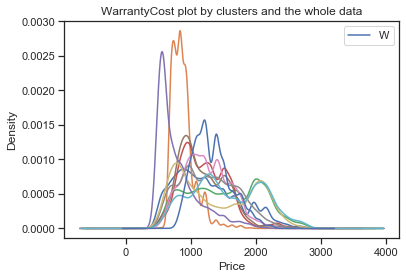

In [507]:
dfrefine['WarrantyCost'].plot(kind='kde')
plt.legend('Whole data')
for cluster in clusters:
    cluster['WarrantyCost'].plot(kind='kde')
plt.title('WarrantyCost plot by clusters and the whole data')
plt.xlabel('Price')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

for cluster in clusters:
    plt.scatter(cluster['kmeans_label'], cluster['Size'])
plt.title('Size plot by clusters')
plt.xlabel('Cluster')
plt.show()

## Hirarchical clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

silhouettes = []
n_c_hir = range(2, 10)
subPcaData = pcaData[0:10000]
for i in n_c_hir:
    clusterer = AgglomerativeClustering(n_clusters=i,
                                         affinity='euclidean',
                                         linkage='ward')
    clusterer = clusterer.fit(subPcaData)
    silhouette = silhouette_score(subPcaData, clusterer.labels_)
    silhouettes.append(silhouette)

In [ ]:
plt.plot(range(2, 10), silhouettes)
plt.xticks(range(1, 11))
plt.title('Silhouette with ward linkage')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [ ]:
import scipy.cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt

data_dist = pdist(subPcaData , metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')
plt.title('Dendrogram with complete linkage')

In [ ]:
import scipy.cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt

data_dist = pdist(subPcaData , metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')
plt.title('Dendrogram with single linkage')

In [ ]:
import scipy.cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt

data_dist = pdist(subPcaData , metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')
plt.title('Dendrogram with ward linkage')

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps = 2.5, min_samples= 180) 
clusterer.fit(pcaData)

In [ ]:
dfCluster['DBSCAN'] = clusterer.labels_
dfCluster['DBSCAN'].value_counts()

In [ ]:
outliersCluster = dfCluster[dfCluster['DBSCAN'] == -1]
inlinersCluster = dfCluster[dfCluster['DBSCAN'] == 0]
print (len(outliersCluster))
print (len(inlinersCluster))
outliersCluster['DBSCAN'] = str(-1)
inlinersCluster['DBSCAN'] = str(0)

In [ ]:
print(outliersCluster.columns)

In [ ]:
inlinersCluster['MMRAcquisitonRetailCleanPrice'].plot(kind='kde', )
outliersCluster['MMRAcquisitonRetailCleanPrice'].plot(kind='kde')
plt.legend(['Inlier', 'Outlier'])
plt.title('Retail clean price cost plot by DBSCAN clusters')
plt.xlabel('Price')
plt.show()

In [ ]:
plt.scatter(inlinersCluster['DBSCAN'], inlinersCluster['Size'])
plt.scatter(outliersCluster['DBSCAN'], outliersCluster['Size'])
plt.title('Auction plot by DBSCAN clusters')
plt.xlabel('Cluster')
plt.show()

# Pattern mining 

## Extract frequent pattern 

In [ ]:
dfrefine.columns
dfrefineClone = dfrefine.copy()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
discr=KBinsDiscretizer(n_bins=8,encode='ordinal',strategy='quantile')
contAttri = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice', 
            'MMRAcquisitonRetailCleanPrice', 'VehBCost', 'WarrantyCost']
for att in contAttri: 
    X = np.array(dfrefineClone[att])
    X = X.reshape(-1, 1)
    X = discr.fit_transform(X)
    discr_attr = att+'_discr'
    dfrefineClone[discr_attr] = X

In [ ]:
dfrefineClone.columns

In [ ]:
dfrefineClone.head()

In [ ]:
dfrefineClone = dfrefineClone.drop( columns = ['RefId', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 
                                   'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                                   'VehBCost', 'WarrantyCost'])

In [ ]:
need_new_name = dfrefineClone.columns
for nnn in need_new_name:
    new_name = ''
    if nnn == 'MMRAcquisitionAuctionAveragePrice_discr':
        new_name += 'AAAP'
    elif nnn == 'MMRAcquisitionRetailAveragePrice_discr':
        new_name += 'ARAP'
    elif nnn == 'MMRAcquisitonRetailCleanPrice_discr':
        new_name += 'ARCP'
    else:
        new_name += nnn
    dfrefineClone[nnn] = new_name + '_' + dfrefineClone[nnn].astype(str)

In [ ]:
dfrefineClone.columns
dfrefineClone.head()

In [ ]:
baskets = dfrefineClone.values.tolist()

In [ ]:
from fim import apriori
setLens = []
for i in range(1, 101):
    itemsets = apriori(baskets, supp = i, zmin = 2, target = 'c')
    setLens.append(len(itemsets))

In [ ]:
plt.figure(figsize = (5, 3))
plt.plot (range(1, 101), setLens)
plt.xlabel('Support')
plt.ylabel('Number of closed item sets')
plt.show 

In [ ]:
smallsetLens = []
for i in range(6, 21):
    itemsets = apriori(baskets, supp = i, zmin = 2, target = 'c')
    smallsetLens.append(len(itemsets))

In [ ]:
plt.figure(figsize = (5, 3))
plt.plot (range(6, 21), smallsetLens)
plt.xlabel('Support')
plt.ylabel('Number of closed item sets')
plt.show 

In [ ]:
def getKey(item):
    return item[1]

itemsets8 = apriori(baskets, supp = 20, zmin = 2, target = 's')
itemsets8=sorted(itemsets8, key=getKey, reverse=True)
maxlen = 0;
for itemset in itemsets8:
    if len(itemset[0]) > maxlen:
        maxlen = len(itemset[0])
print(maxlen)
for itemset in itemsets8:
    if len(itemset[0]) >= maxlen:
        print(itemset)

## Association rule 

In [ ]:
from fim import apriori
ruleLens = []
for i in range(80, 101):
    rules = apriori(baskets, supp = 30, zmin = 2, target = 'r', conf=i)
    ruleLens.append(len(rules))

In [ ]:
plt.figure(figsize = (5, 3))
plt.plot (range(80, 101), ruleLens)
plt.xlabel('Confident')
plt.ylabel('Number of rules')
plt.show 

In [ ]:
rule98 = apriori(baskets, supp = 30, zmin = 2, target = 'r', conf=90)

In [ ]:
print(len(rule98))

In [ ]:
for rule in rule98:
    print(rule)

In [ ]:
rules = apriori(baskets, supp=30, zmin=2, target='r', conf=30,
                report='ascl')

In [ ]:
list_confidence=list()
list_lift=list()
for i in range(len(rules)):
    confidence=rules[i][4]
    list_confidence.append(confidence)
    lift=rules[i][5]
    list_lift.append(lift)

In [ ]:
plt.hist(list_confidence,bins=35, cumulative=-1)
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.hist(list_lift,bins=70, cumulative=-1)
plt.xlabel('Lift')
plt.ylabel('Count')
plt.show()

### Replace missing value

In [ ]:
df_Nationality = df[df['Nationality'].isnull()]

In [ ]:
print(df_Nationality['TopThreeAmericanName'])

In [ ]:
df_onlinesale = df[df['IsOnlineSale'].isnull()]

In [ ]:
print(df_onlinesale)

In [ ]:
df_trans = df[df['Transmission'].isnull()]

In [ ]:
df_trans['Auction']

In [ ]:
df['TopThreeAmericanName'].value_counts()

### Predict the target variable

In [ ]:
dftest = pd.read_csv('test.csv')
print(len(dftest))

In [ ]:
dftest.columns

In [ ]:
dftest['IsBadBuy']

In [ ]:
fil = ((dftest['Transmission'] == 'AUTO') | (dftest['IsOnlineSale'] == 0) | 
       (dftest['WheelTypeID'] == 0) | (dftest['Size'] == 'MEDIUM') | 
       (dftest['TopThreeAmericanName'] == 'CHRYSLER') | (dftest['TopThreeAmericanName'] == 'GM'))
dfpred = dftest.loc[fil]
print(len(dfpred))

In [ ]:
dfpred['IsBadBuyPred'] = 0

In [ ]:
correctfil = ((dfpred['IsBadBuy'] == dfpred['IsBadBuyPred']))
dfpredcorr = dfpred.loc[correctfil]
print(len(dfpredcorr))

# Classification 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,precision_score,recall_score,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [444]:
dfrefine.columns

Index(['RefId', 'IsBadBuy', 'Auction', 'VehYear', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'PurchMonth', 'PurchYear'],
      dtype='object')

In [445]:
dfX = dfrefine.drop(columns=['RefId', 'IsBadBuy', 'Auction', 'Trim',
       'SubModel', 'Color', 'BYRNO', 'VNZIP1', 'VNST', 'PurchMonth', 'PurchYear', 'Model'])
dfX.columns

Index(['VehYear', 'Make', 'Transmission', 'WheelTypeID', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost'],
      dtype='object')

In [446]:
dfXOneHot = pd.get_dummies(dfX, columns=['Make', 'Transmission', 'WheelTypeID', 'Nationality',
       'TopThreeAmericanName', 'IsOnlineSale', 'Size', 'VehYear'])
dfy = dfrefine['IsBadBuy']

In [447]:
dfXNorm = (dfXOneHot - dfXOneHot.min())/(dfXOneHot.max() - dfXOneHot.min())
dfXNorm.head()

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,VehBCost,WarrantyCost,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,...,Size_VAN,VehYear_2001,VehYear_2002,VehYear_2003,VehYear_2004,VehYear_2005,VehYear_2006,VehYear_2007,VehYear_2008,VehYear_2009
0,0.373799,0.484783,0.550067,0.514042,0.432112,0.030381,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.758042,0.375353,0.311920,0.314390,0.215281,0.499786,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.186364,0.590471,0.609764,0.564870,0.576665,0.098845,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.607616,0.320223,0.266108,0.327172,0.290139,0.501070,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.573169,0.371196,0.308465,0.325552,0.387713,0.496791,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [448]:
X = dfXNorm.values
y = dfy.values
print(X.shape)

(50799, 69)


In [ ]:
onetrial = DecisionTreeClassifier()

param_list_one_trial = {'criterion': ['gini','entropy'],
                        'splitter': ['best', 'random']
#               'min_samples_split': list(range(200,600,50))
#               'min_samples_leaf': list(range(100,400,40))
#               'max_depth': list(range(5,20))
#               'min_impurity_decrease': list(np.arange(0.0001,0.001,0.0002))
#               'class_weight': [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:3.5}]
             }

#applico la ricerca dei parametri con GridSearchCV per la ricerca dei parametri
grid_search_onetrial = GridSearchCV(onetrial, param_grid=param_list_one_trial, scoring='f1_weighted', verbose = 2, n_jobs = -1)
grid_search_onetrial.fit(X, y)

In [ ]:
def plot_grid_search(cv_results):
#     print(cv_results)
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(2, 2)
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(2, 2)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(['gini', 'entropy']):
        ax.plot(['best', 'random'], scores_mean[idx,:], '-o', label= 'criterion' + ': ' + str(val))

    ax.set_title("Grid Search Scores", )
    ax.set_xlabel('Splitter')
    ax.set_ylabel('CV Average Score')
    ax.legend(loc="best", fontsize=10)
    ax.grid('on')

In [ ]:
plot_grid_search(grid_search_onetrial.cv_results_)

In [ ]:
clf = DecisionTreeClassifier()

param_list = {'criterion': ['gini','entropy'],
              'min_samples_split': list(range(200,600,50)),
              'min_samples_leaf': list(range(100,200,40)),
              'max_depth': list(range(5,10)),
              'min_impurity_decrease': list(np.arange(0.0001,0.001,0.0002)),
              'class_weight': [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}]
             }

#applico la ricerca dei parametri con GridSearchCV per la ricerca dei parametri
grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1_weighted', verbose = 2, n_jobs = -1)
grid_search.fit(X, y)

In [ ]:
print(grid_search.best_estimator_)

In [475]:
bestSearch = grid_search.best_estimator_
start = timeit.default_timer()
bestSearch.fit(X, y)
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.5600979230075609


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bestSearch, X, y, scoring='f1', n_jobs = -1, verbose = 1)
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(bestSearch, X, y, scoring='accuracy', n_jobs = -1, verbose = 1)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(bestSearch, X, y, scoring='precision', n_jobs = -1, verbose = 1)
print('precision: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(bestSearch, X, y, scoring='recall', n_jobs = -1, verbose = 1)
print('recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

## Decision tree interpretation

In [ ]:
import pydotplus
from sklearn import tree
from IPython.display import Image

import os     

dot_data = tree.export_graphviz(bestSearch, out_file=None,  
                                feature_names=dfXNorm.columns, 
                                #class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Decision tree validation with test and training set

In [ ]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix

bestSearch.fit(X, y)
y_pred=bestSearch.predict(X)
print('accuracy_score %s' % accuracy_score(y, y_pred))
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

In [ ]:
dfX.columns

In [ ]:
dftest.columns

In [ ]:
dfXTest = dftest.drop(columns=['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehicleAge',
       'Model', 'Trim', 'SubModel', 'Color',
       'WheelType', 'MMRAcquisitionAuctionCleanPrice',
       'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST'])
dfXTest.columns

In [ ]:
dfXTestOneHot = pd.get_dummies(dfXTest, columns=['Make', 'Transmission', 'WheelTypeID', 'Nationality',
       'TopThreeAmericanName', 'IsOnlineSale', 'Size', 'VehYear'])
dfytest = dftest['IsBadBuy']
print(len(dfytest))
dfXTest.head()

In [ ]:
dfXTestOneHot = dfXTestOneHot.drop(columns=['Make_INFINITI', 'Make_MINI', 'Make_PLYMOUTH', 'Make_VOLKSWAGEN', 'Make_VOLVO', 'WheelTypeID_0.0'])

In [ ]:
dfXTestOneHot.columns
dfXTestOneHot.insert(loc=32, column='Make_TOYOTA SCION', value=0)
dfXTestOneHot.insert(loc=35, column='Transmission_Manual', value=0)
dfXTestOneHot = dfXTestOneHot.drop(columns=['Nationality_OTHER'])
dfXTestOneHot.columns

In [ ]:
dfXOneHot.columns

In [ ]:
dfXTestNorm = (dfXTestOneHot - dfXTestOneHot.min())/(dfXTestOneHot.max() - dfXTestOneHot.min())
dfXTestNorm=dfXTestNorm.fillna(0)

In [ ]:
Xtest = dfXTestNorm.values
ytest = dfytest.values
print(Xtest)

In [476]:
start = timeit.default_timer()
ytest_pred=bestSearch.predict(Xtest)
stop = timeit.default_timer()
print('Time: ', stop - start) 

print('accuracy_score %s' % accuracy_score(ytest, ytest_pred))
print(classification_report(ytest, ytest_pred))
print(confusion_matrix(ytest, ytest_pred))

Time:  0.009046266000950709
accuracy_score 0.8744262519695828
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     12829
           1       0.24      0.02      0.03      1768

    accuracy                           0.87     14597
   macro avg       0.56      0.50      0.48     14597
weighted avg       0.80      0.87      0.82     14597

[[12735    94]
 [ 1739    29]]


In [ ]:
feature_cols = dfXNorm.columns
print(bestSearch.feature_importances_)
importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": bestSearch.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
imfg = importance[:18].plot(x="feature", y="importance", kind="bar")
plt.ylabel("importance")
plt.setp(imfg.get_xticklabels(), rotation=30, ha ='right')

# Addition tasks

## KNN classification 

In [471]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='brute')

In [472]:
start = timeit.default_timer()
ytest_pred=knn.fit(X, y)
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.01604723301716149


In [450]:
print(X.shape)

(50799, 69)


In [473]:
import timeit

start = timeit.default_timer()
ytest_pred=knn.predict(Xtest)
stop = timeit.default_timer()
print('Time: ', stop - start)  

print('accuracy_score %s' % accuracy_score(ytest, ytest_pred))
print(classification_report(ytest, ytest_pred))
print(confusion_matrix(ytest, ytest_pred))

Time:  28.357611254992662
accuracy_score 0.8060560389121052
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     12829
           1       0.16      0.14      0.15      1768

    accuracy                           0.81     14597
   macro avg       0.52      0.52      0.52     14597
weighted avg       0.80      0.81      0.80     14597

[[11510  1319]
 [ 1512   256]]


## Naive Bayesian 

In [485]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB 
NB = BernoulliNB()
start = timeit.default_timer()
NB.fit(X, y)
stop = timeit.default_timer()
print('Time: ', stop - start)  

Time:  0.10382994799874723


In [486]:
start = timeit.default_timer()
ytest_pred=NB.predict(Xtest)
stop = timeit.default_timer()
print('Time: ', stop - start)  

print('accuracy_score %s' % accuracy_score(ytest, ytest_pred))
print(classification_report(ytest, ytest_pred))
print(confusion_matrix(ytest, ytest_pred))

Time:  0.029836878005880862
accuracy_score 0.8636706172501198
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     12829
           1       0.20      0.04      0.07      1768

    accuracy                           0.86     14597
   macro avg       0.54      0.51      0.50     14597
weighted avg       0.80      0.86      0.82     14597

[[12532   297]
 [ 1693    75]]


## EM clustering 

In [492]:
from sklearn.mixture import GaussianMixture
GM = GaussianMixture(verbose=1, n_components = 10)
GM.fit(X)

Initialization 0
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=1, verbose_interval=10, warm_start=False,
                weights_init=None)

In [494]:
dfDummyCluster['EM'] = GM.fit_predict(X)

Initialization 0
Initialization converged: True


In [495]:
dfDummyCluster['EM'].value_counts()

0    8568
7    7548
3    6236
6    5919
4    5614
1    4428
5    3555
2    3217
8    3078
9    2636
Name: EM, dtype: int64

In [498]:
EMclusters = []
EMclusterSize = []
for i in range(10):
    EMcluster = dfCluster[dfDummyCluster['EM']==i]
    EMcluster['EM'] = str(i)
    EMclusters.append(EMcluster)
    EMclusterSize.append(len(EMcluster))

/Users/phamgiang/opt/anaconda3/envs/FirstSemeter/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 792x360 with 0 Axes>

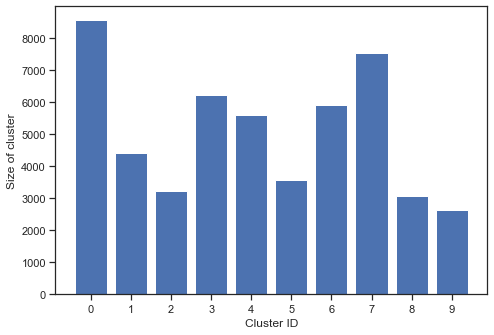

In [499]:
plt.figure(figsize = (11, 5))
EMclusterID = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(EMclusterID,EMclusterSize)
plt.xlabel('Cluster ID')
plt.ylabel('Size of cluster')
plt.show()

In [503]:
dfrefine.columns

Index(['RefId', 'IsBadBuy', 'Auction', 'VehYear', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'PurchMonth', 'PurchYear'],
      dtype='object')

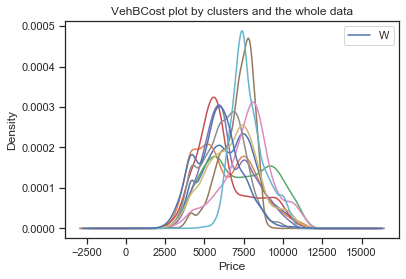

In [509]:
dfrefine['VehBCost'].plot(kind='kde')
plt.legend('Whole data')
for EMcluster in EMclusters:
    EMcluster['VehBCost'].plot(kind='kde')
plt.title('VehBCost plot by clusters and the whole data')
plt.xlabel('Price')
plt.show()

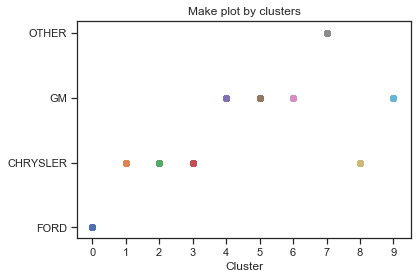

In [513]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

for EMcluster in EMclusters:
    plt.scatter(EMcluster['EM'], EMcluster['TopThreeAmericanName'])
plt.title('Make plot by clusters')
plt.xlabel('Cluster')
plt.show()